In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [11]:
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [7]:
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')

df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [60]:
df_final_train.shape

(100002, 55)

In [8]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [38]:
train_graph2=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',nodetype=int)

In [69]:
#function to computr preferential attachment
def compute_pref_attach(a,b):
    pred= nx.preferential_attachment(train_graph2,[(a,b)])
    for u, v, p in pred:
        x=p
    return p

In [120]:
#featurixzing
pref_train=[]
for i,row in df_final_train.iterrows():
    try:
        pref_train.append(compute_pref_attach(row['source_node'],row['destination_node']))
    except:
        pref_train.append(0)
pref_test=[]
for i,row in df_final_test.iterrows():
    try:
        pref_test.append(compute_pref_attach(row['source_node'],row['destination_node']))
    except:
        pref_test.append(0)

In [121]:
df_final_train['pref_attach']=pref_train

In [122]:
df_final_test['pref_attach']=pref_test

In [125]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_attach
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,144
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,14134
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,1920
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,70
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52


In [145]:
#adding dot product of svd features
df_final_train['dot_u']=df_final_train.apply(lambda row: np.dot(row[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']]\
                                            ,row[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']]),axis=1)
df_final_test['dot_u']=df_final_test.apply(lambda row: np.dot(row[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']]\
                                            ,row[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']]),axis=1)

df_final_train['dot_v']=df_final_train.apply(lambda row: np.dot(row[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']]\
                                            ,row[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']]),axis=1)


df_final_test['dot_v']=df_final_test.apply(lambda row: np.dot(row[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']]\
                                            ,row[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']]),axis=1)


In [146]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,pref_attach,dot_1,dot_u,dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,144,3.395797e-24,1.114958e-11,2.238775e-12
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,14134,1.159480e-24,3.192812e-03,9.068719e-04
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,1920,1.277284e-35,1.787503e-35,2.467873e-36
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,70,2.619942e-24,4.710376e-20,3.159386e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52,8.693381e-26,7.773952e-14,0.000000e+00


In [152]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [153]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### XGBOOST

In [161]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Estimators =  10 Train Score 0.9302705761532497 test Score 0.9260226650377049
Estimators =  50 Train Score 0.9723734501252066 test Score 0.9311728916680752
Estimators =  100 Train Score 0.9768251110189465 test Score 0.9293160437325197
Estimators =  250 Train Score 0.9870221257175025 test Score 0.9270780214176441
Estimators =  450 Train Score 0.995103095364464 test Score 0.9246432374866879


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

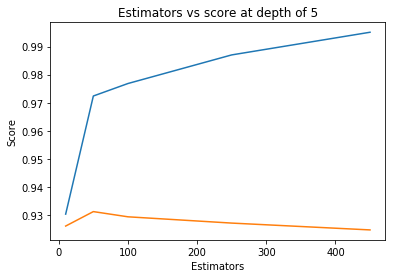

In [204]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(bootstrap=True, class_weight=None, 
            max_depth=5, max_features='auto', n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8877327778417478 test Score 0.8770008246463535
depth =  9 Train Score 0.9592526944155818 test Score 0.924917839386534
depth =  11 Train Score 0.9631591767141638 test Score 0.925142580550119
depth =  15 Train Score 0.9733136704309003 test Score 0.9290414818241071
depth =  20 Train Score 0.9841068022886205 test Score 0.931101989264288
depth =  35 Train Score 0.9981785428342674 test Score 0.9312649766679278
depth =  50 Train Score 0.998579431772709 test Score 0.9310431821048648
depth =  70 Train Score 0.998579431772709 test Score 0.9310344827586208
depth =  130 Train Score 0.998579431772709 test Score 0.9310344827586208


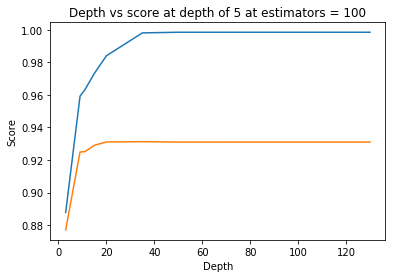

In [208]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None,
            max_depth=i, n_estimators=50, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 100')
plt.show()

In [209]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(50,200),
              "max_depth": sp_randint(10,30),
              }

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xg = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,verbose=5,n_jobs=-1)

xg.fit(df_final_train,y_train)
print('mean test scores',xg.cv_results_['mean_test_score'])
print('mean train scores',xg.cv_results_['mean_train_score'])

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 63.4min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 67.7min finished


mean test scores [0.98078533 0.97892096 0.97985546 0.98097054 0.98095845]
mean train scores [0.99996448 1.         1.         1.         1.        ]


In [210]:
print(xg.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=14, min_child_weight=1, missing=None, n_estimators=139,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [220]:
clf = xgb.XGBClassifier(random_state=25,n_jobs=-1,n_estimator=139,depth=14)

In [221]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [222]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.973270694961931
Test f1 score 0.928536642175027


Train confusion_matrix


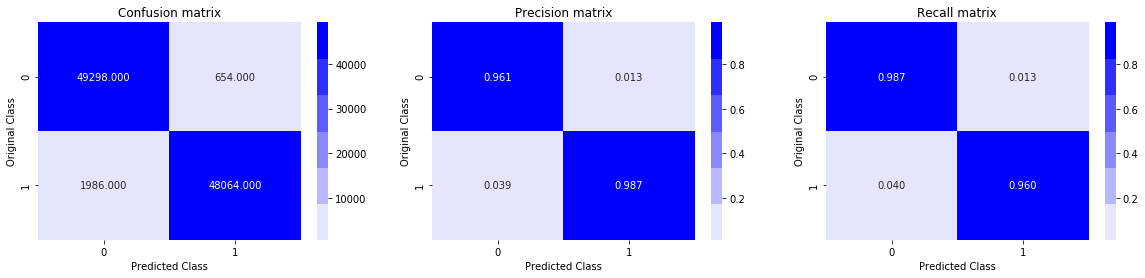

Test confusion_matrix


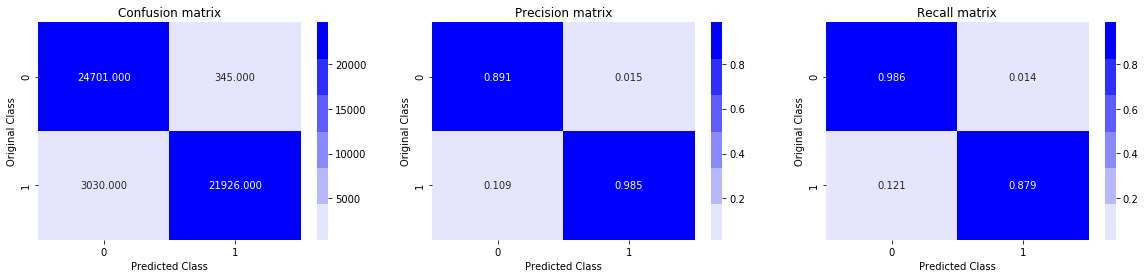

In [223]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

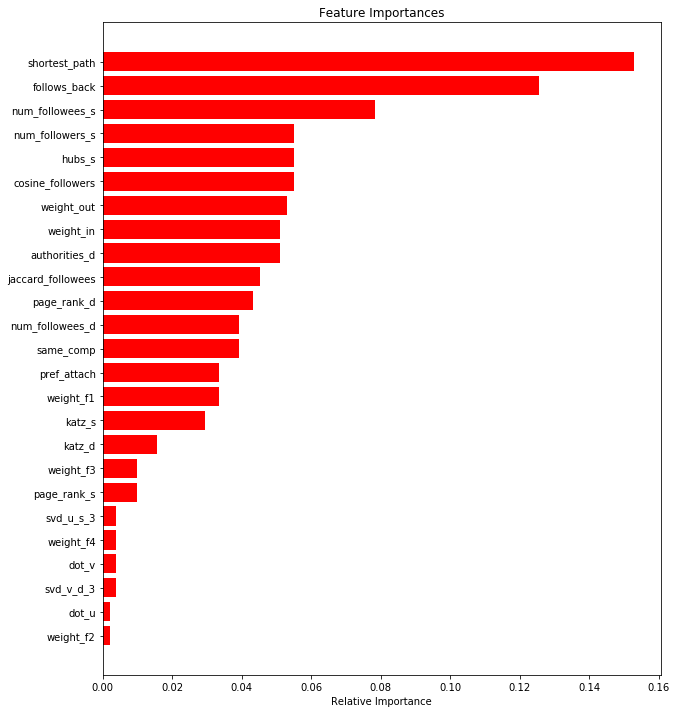

In [224]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Objective: Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph)

1. We have 1862220 users and 9437519 edges with two columns i.e source node and destination node
<br>
2. We do exploratory data analysis to get to know about the distribution and get some insights like the number of followers each person has and the number of persons user follows, check for null values.
<br>
3. We try to pose it as a classification problem, since we only have nodes with edges i.e class 1, we create the same number of data points with shortest path of 2 for class zero,
<br>
4. We split the dataset into train and test in 80:20 ratio. We then featurize the data using similarity features like jaccard distance, cosine similarity, rank features like page rank, we try other features like adar index, wcc, katz centralty, hits score, svd etc.
<br>
5. We take a sample from train and test set and also check for cold start problem and featurize the data.
<br>
6. We use random forest classifier, use test set as cv set and hyperparameter tune them to improve the performance. We use Confusion metric and f1 score as evaluation metric.
<br>
7. We then add some more features like svd dot and preferential attachment and try out xgboost model and hyperparameter tune them to improve the performance of the model.
<br>
8. We get the f1 score of 92.85 which is slightly higher than random forest.
